# in The name of God

In [1]:
import numpy as np
import pandas

import matplotlib.pyplot as plt

from numpy import linalg as LA

In [2]:
d = pandas.read_excel('data.xlsx')

In [3]:
X = d.iloc[:,1]
Y = d.iloc[:,2]

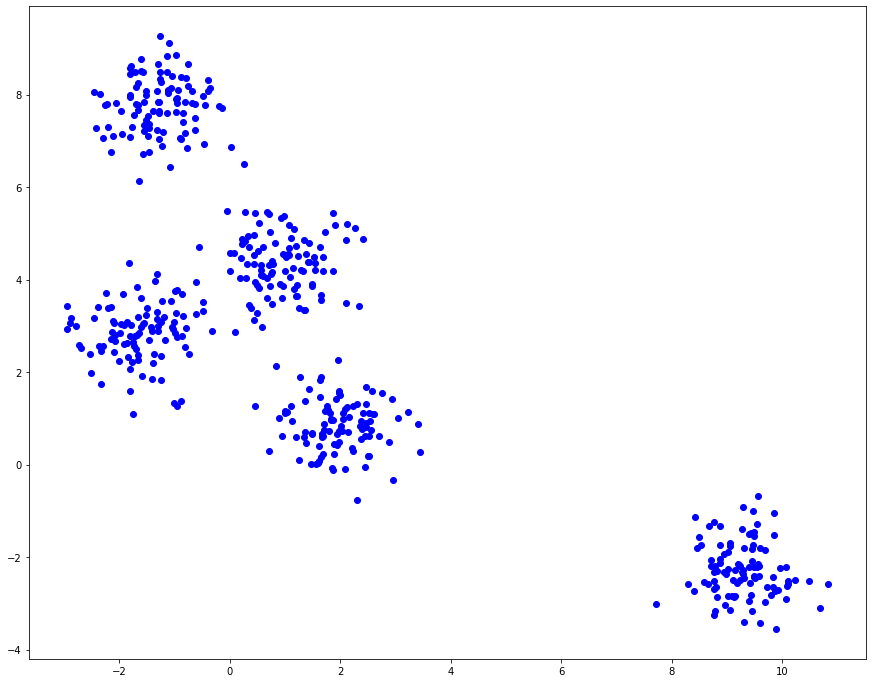

In [15]:
plt.figure(figsize=(15,12))
plt.scatter(X, Y, c ="blue")
plt.show()

Well, it seems like best distance we could work with is Euclidean(L2 norm)

In [5]:
points = d.iloc[:,1:3].to_numpy()

In [18]:
#the Algorithm
    #Defining parameters
Nclus = 5                                                    #Number of clusters
Nvar = 2                                                     #Number of variables
a11 = -4; a12 = 12; a21 = -4; a22 = 10;
Npoints = points.shape[0]
################################################################################
means = np.random.random((5,2))                              #means Genesis
means = means@np.diag([a12-a11,a22-a21])                     #streching them
means = means+np.repeat(np.array([[a11, a21]]), 5, 0)        #putting them in place

for j in range(100):
    Dist = LA.norm(points, ord = 2, axis = 1, keepdims=True)     #initializing Distance matrix    

    for i in range(Nclus):
        Dist = np.hstack((Dist,LA.norm(points-np.repeat([means[i]], Npoints, 0), ord = 8, axis = 1, keepdims=True))) 
                                                                 #dist matrix explained at the last cell
    Dist = np.delete(Dist,0,1)                                   #drops first column (diastance from zero)
    which = np.argmin(Dist, axis=1)                              #says which point belongs to which cluster


    Clusters = []                                                #initializing Clusters
    for i in range(Nclus):
        Clusters.append(np.array([means[i]]))
    for i in range(Npoints):                                     #putting points in their clusters
        Clusters[which[i]] = np.vstack((Clusters[which[i]], points[i]))
    Cluslen = []
    for i in range(Nclus):      
        Cluslen.append(Clusters[i].shape[0])
    for i in range(Nclus):                                       #updating the meeans                          
        if Cluslen == 1:                                         #if cluster is isolated give it another chance!
            means[i] = np.random.random((1,2))
        else:
            means[i] = LA.norm(Clusters[i], ord = 1, axis = 0, keepdims=True)/Clusters[i].shape[0]

In [19]:
Cluslen

[100, 101, 202, 101, 1]

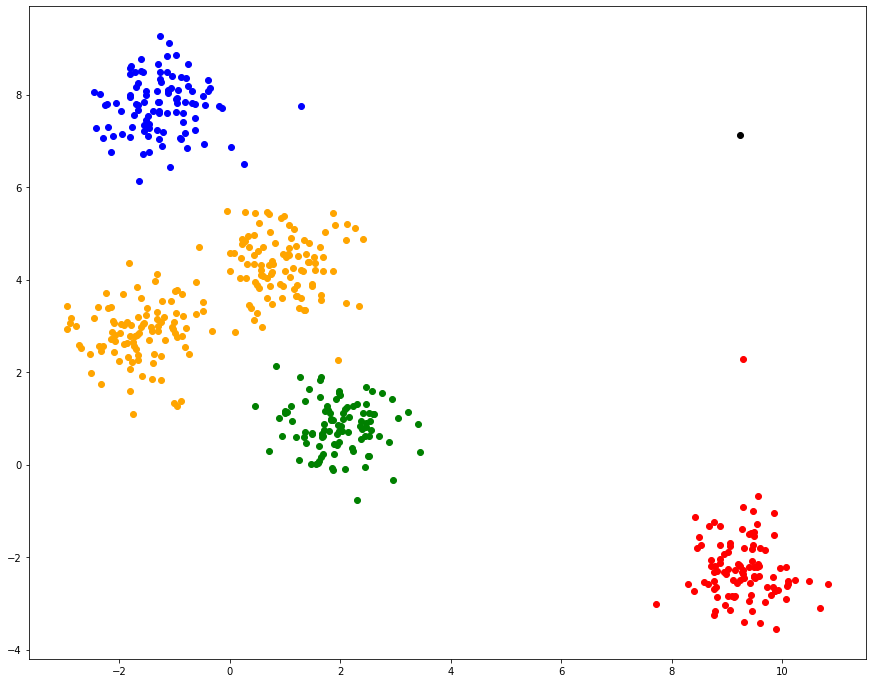

In [20]:
plt.figure(figsize=(15,12))
plt.scatter(Clusters[1][:,0],Clusters[1][:,1], c ="blue")
plt.scatter(Clusters[3][:,0],Clusters[3][:,1], c ="red")
plt.scatter(Clusters[0][:,0],Clusters[0][:,1], c ="green")
plt.scatter(Clusters[2][:,0],Clusters[2][:,1], c ="orange")
plt.scatter(Clusters[4][:,0],Clusters[4][:,1], c ="black")
plt.show()

In [11]:
means

array([[1.9537679 , 0.84980994],
       [9.29102368, 2.27528389],
       [1.28522734, 7.75768153],
       [1.29258644, 3.60163171],
       [4.90445353, 6.52994039]])

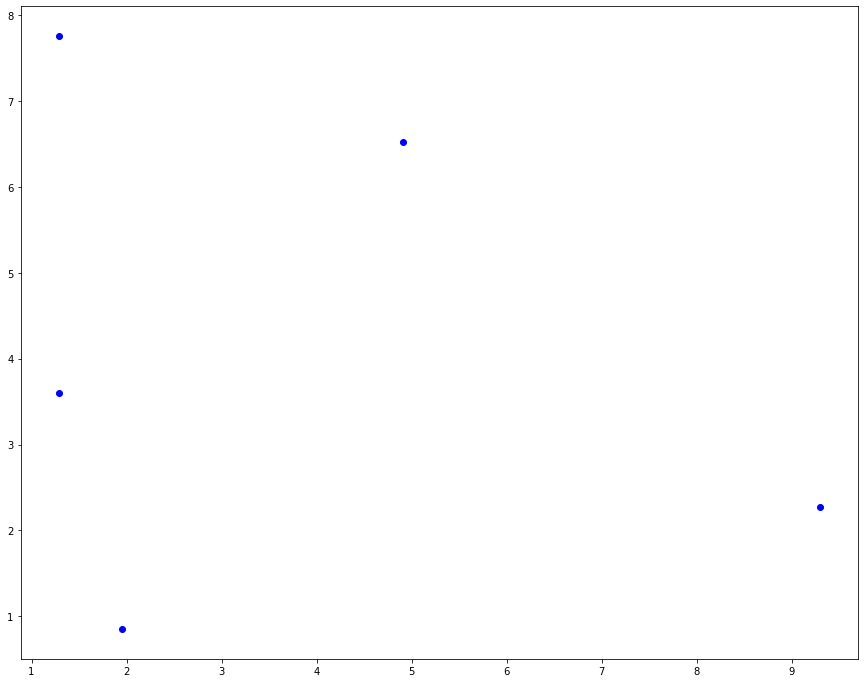

In [17]:
plt.figure(figsize=(15,12))
plt.scatter(means[:,0],means[:,1], c ="blue")
plt.show()

In [ ]:
#Distance matrix has diatance of points from means in columns 1:5 and from zero in column 0
#Clusters is a list contains arrays of each mean point